In [6]:
# Installing ffmpeg for playing video's in notebook
import imageio

imageio.plugins.ffmpeg.download()

<IPython.core.display.Javascript object>


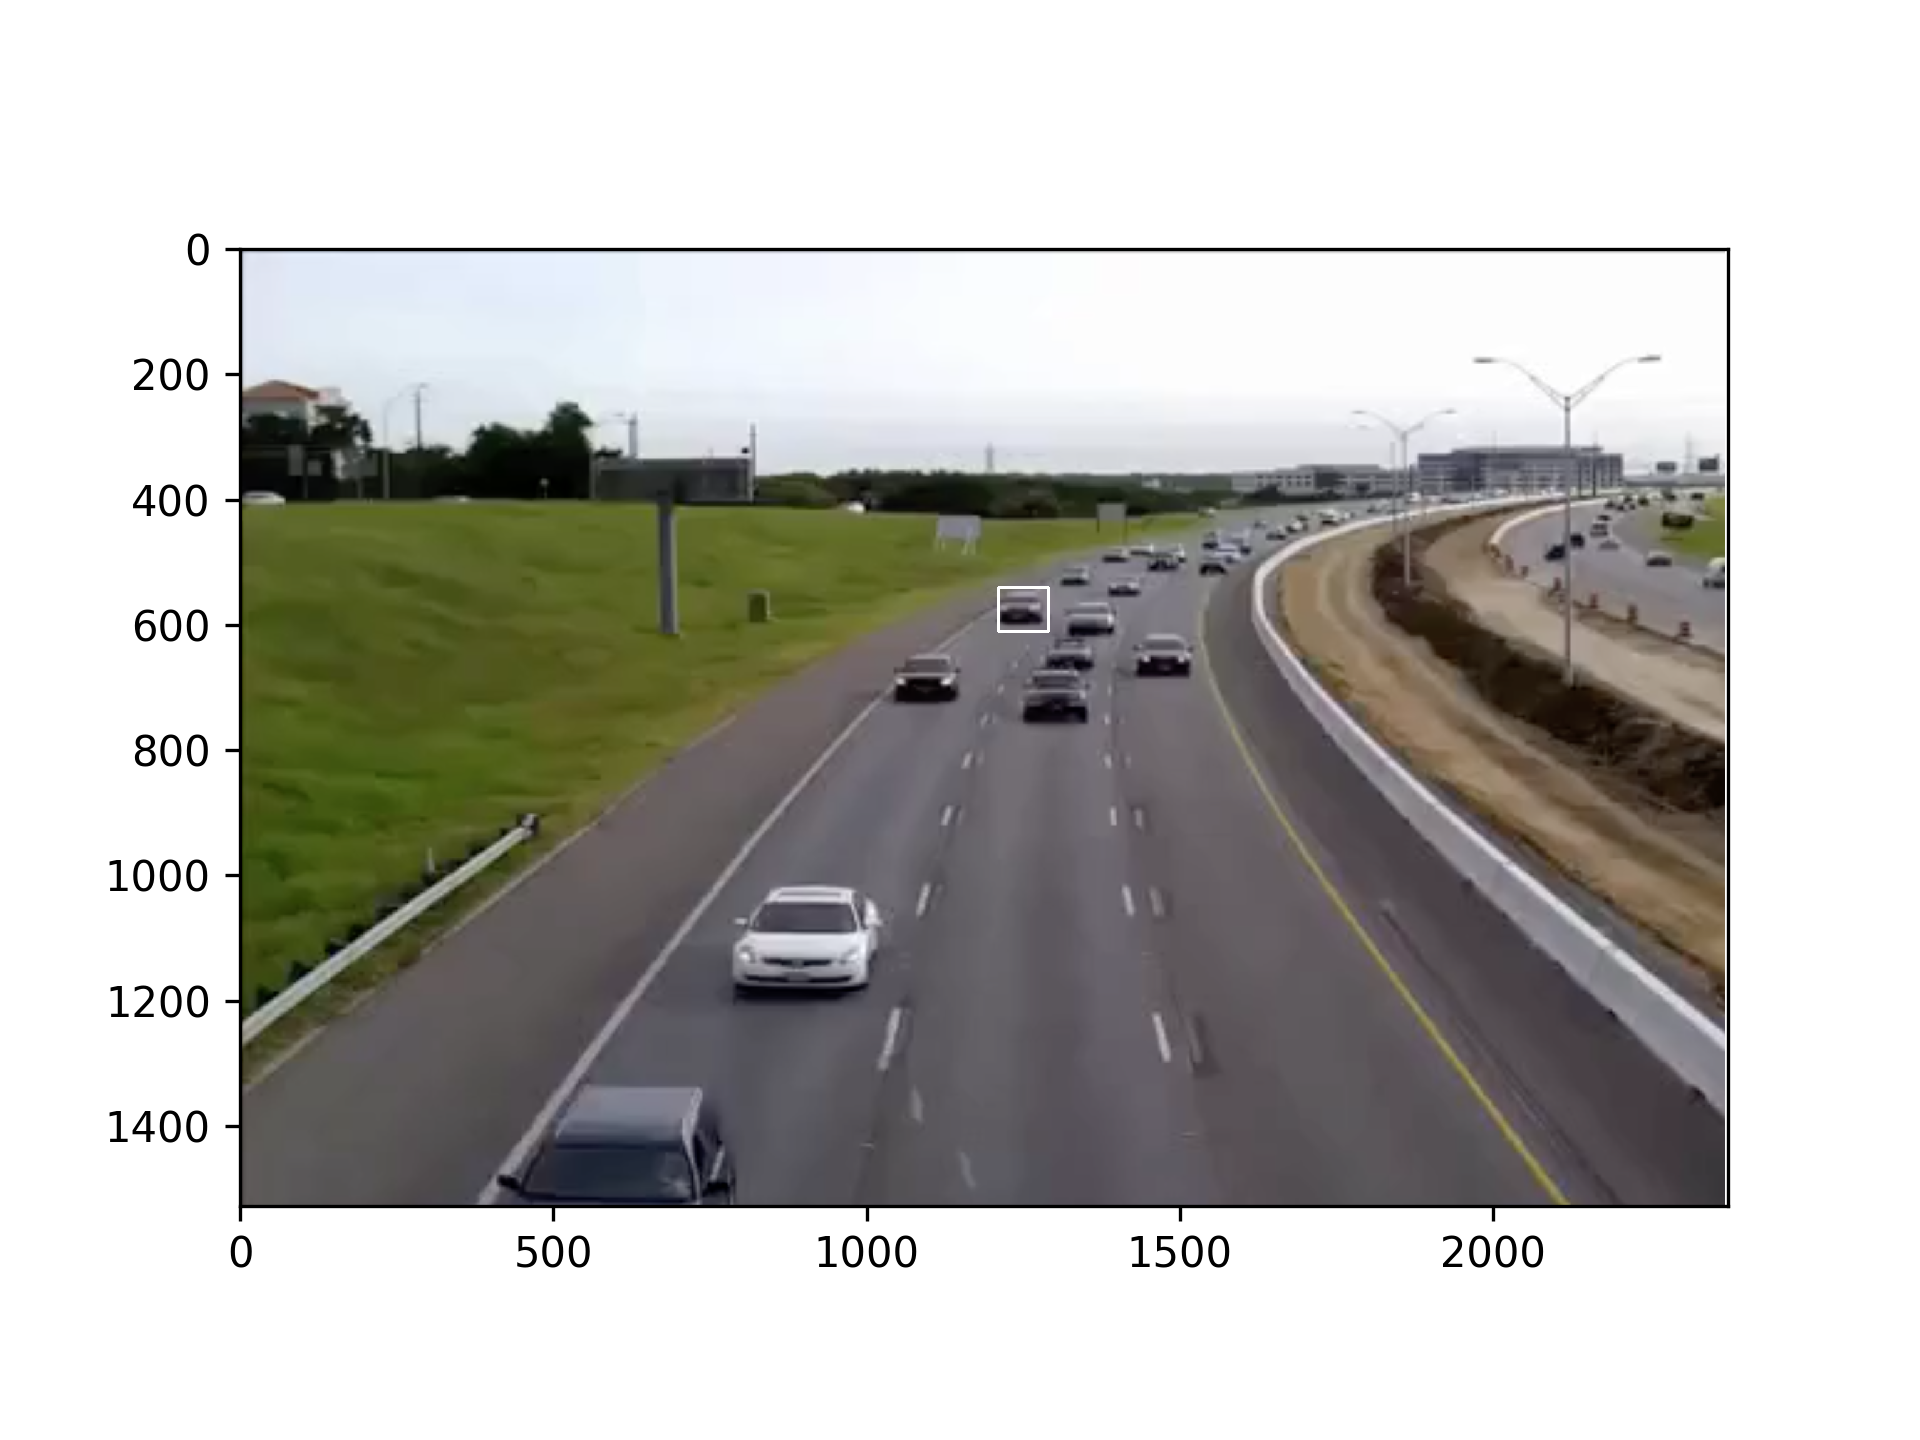

In [56]:
# frame of reference - for ROI
import os
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib notebook

IMG_SRC = os.path.join("resources","images","ROI.png")
img = mpimg.imread(IMG_SRC)

c,r,w,h = 1211,540,80,70
track_window = (c,r,w,h)

# Create ROI mask
roi = img[r:r+h, c:c+w]

# converting RGB to HSV
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 30.,32.)), np.array((180.,255.,255.)))

roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)
term_crit = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 80, 1)

img = cv2.rectangle(img,(1211,540),(1291,610),(0,255,0),3)


plt.imshow(img)
plt.show()


In [60]:
# process image
import cv2

#c,r,w,h = 1211,540,80,70
#track_window = (c,r,w,h)
global track_window
def do_mean_shift_track(frame):
    
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
    
    
    # apply meanshift to get the new location
    ret, track_window = cv2.CamShift(dst, track_window, term_crit)
        
    # Draw it on image
    pts = cv2.boxPoints(ret)
    pts = np.int0(pts)
    newframe = cv2.polylines(frame, [pts],True, 255,2)
    return newframe
    

Populating the interactive namespace from numpy and matplotlib


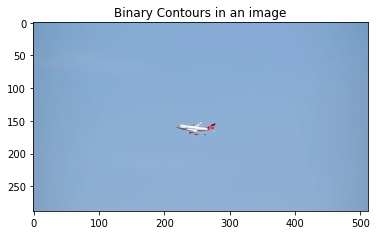

error: /Users/rmunshi/opencv/modules/core/src/arithm.cpp:1944: error: (-209) The lower bounary is neither an array of the same size and same type as src, nor a scalar in function inRange


In [76]:
# Mean Shift Example

import numpy as np
import cv2
from IPython.display import clear_output

%pylab inline 

vid = cv2.VideoCapture('resources/images/planeCam.mp4')
# take first frame of the video

ret,frame = vid.read()
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

# setup initial location of window
c,r,w,h = 1211,540,80,70
track_window = (c,r,w,h)

plt.figure("Example 5")
plt.imshow(frame)
plt.title('Binary Contours in an image')
plt.show()

# set up the ROI for tracking


roi = frame[r:r+h, c:c+w]
hsv_roi =  cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_roi, np.array((0., 30.,32.)), np.array((180.,255.,255.)))
roi_hist = cv2.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )

try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            vid.release()
            break
        
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        
        # apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window, term_crit)
        
        # Draw it on image
        x,y,w,h = track_window
        
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        
        # Turn off the axis
        axis('off')
        
        # Title of the window
        title("Input Stream")
        
        # Display the frame
        imshow(img2)
        show()
        
        # Display the frame until new frame is available
        clear_output(wait=True)
        
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()

In [61]:
# Video Analysis Examples run 

import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML

VIDEO_SRC=os.path.join("resources","images")
i_video  = os.path.join(VIDEO_SRC,"videoShift.mp4")
o_video = os.path.join(VIDEO_SRC,"videoShift_out.mp4")

input_video = VideoFileClip(i_video)
input_clip = input_video.fl_image(do_mean_shift_track)
%time input_clip.write_videofile(o_video, audio=False)



UnboundLocalError: local variable 'track_window' referenced before assignment

In [42]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(o_video))

<IPython.core.display.Javascript object>


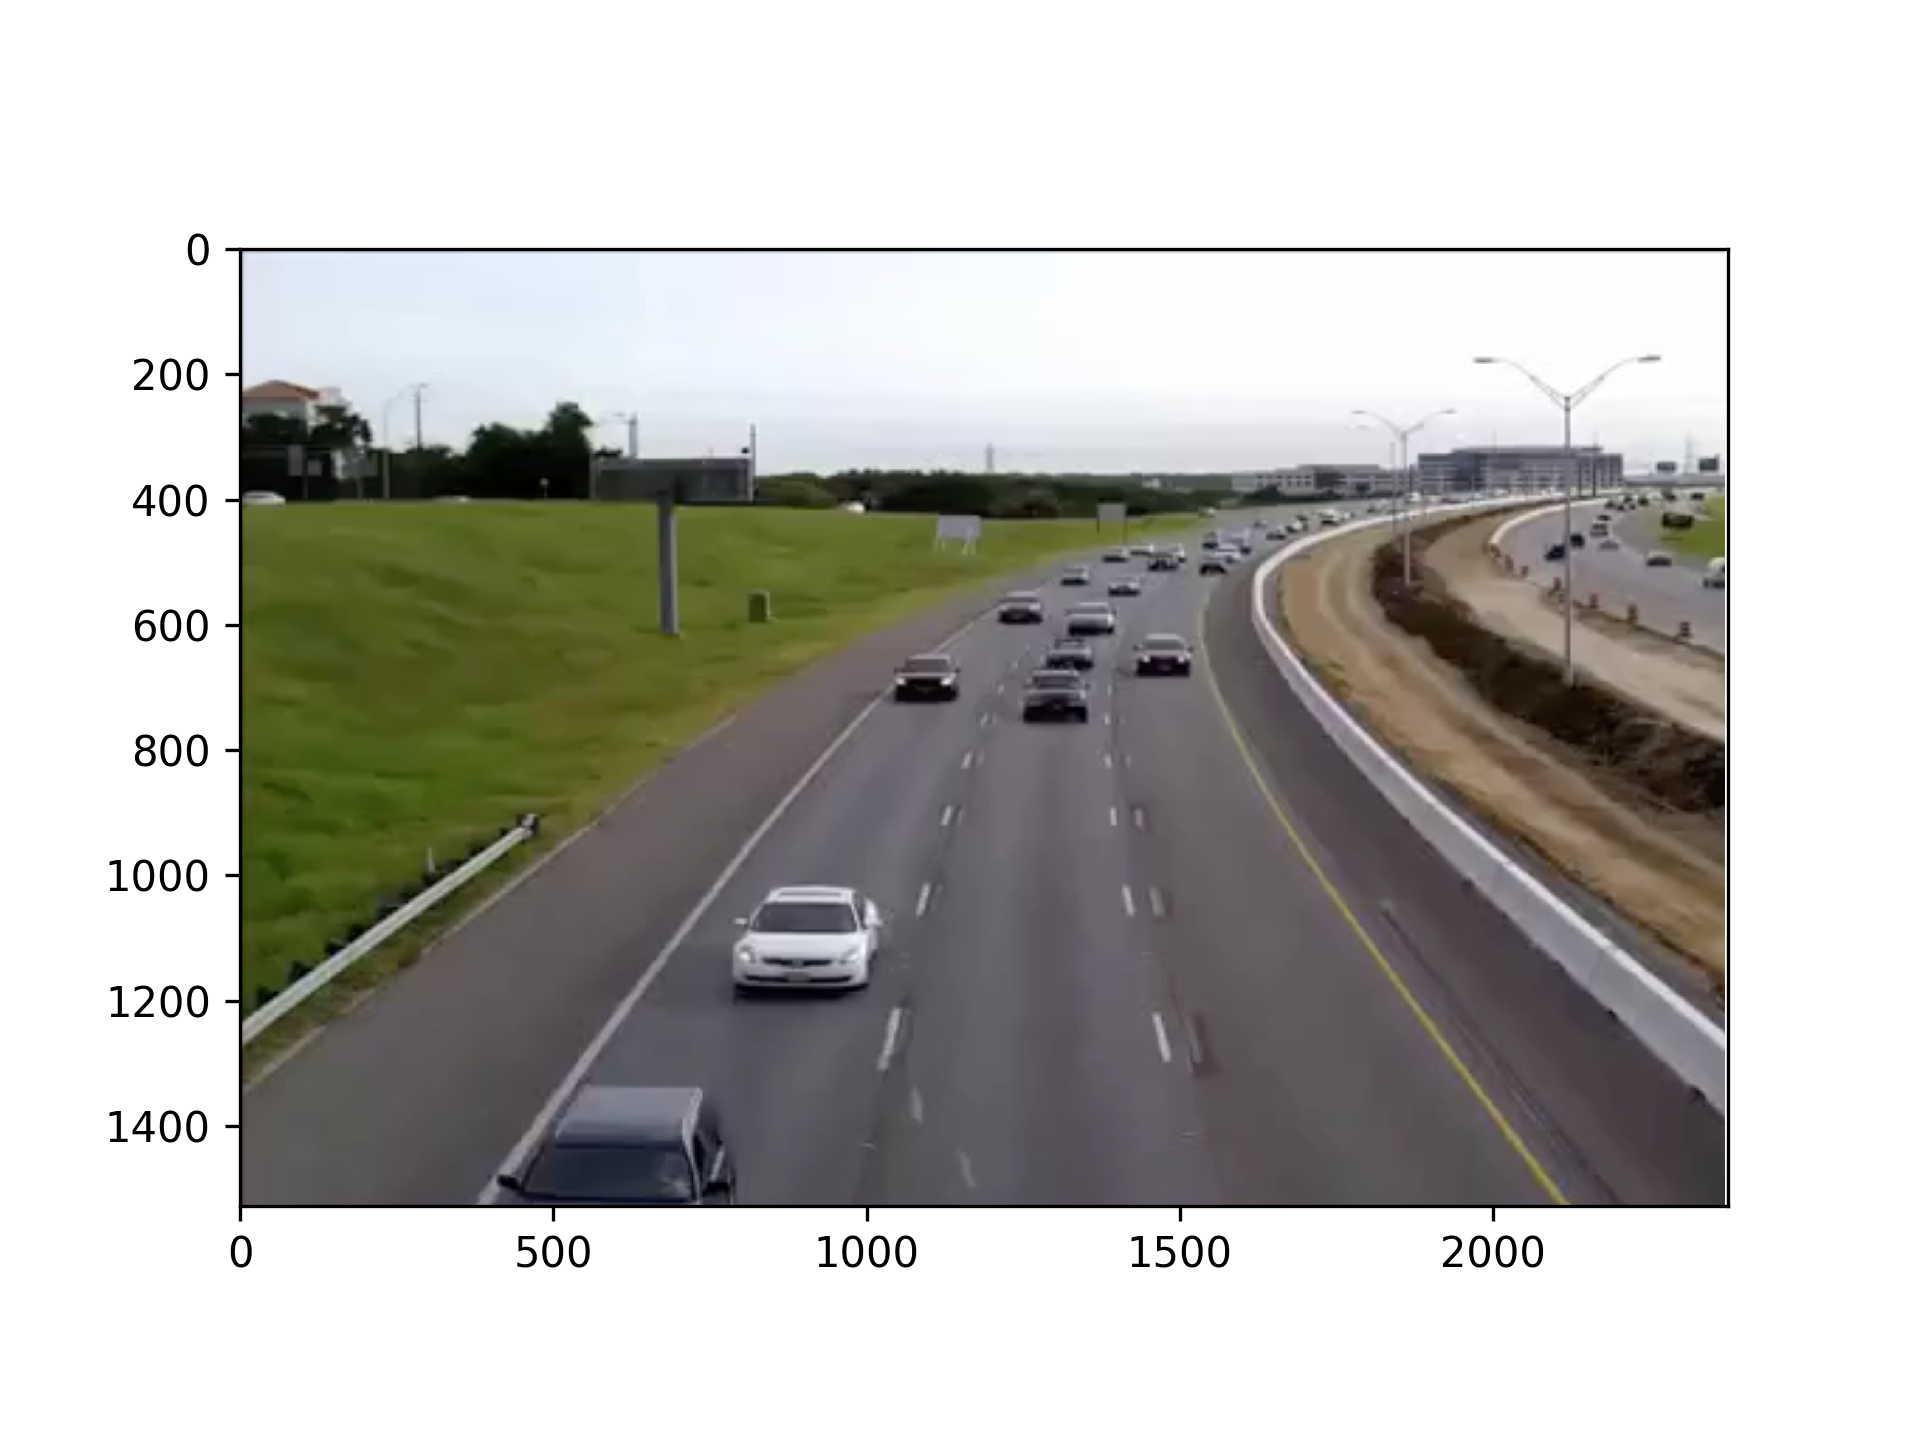